In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os
import numpy as np
import pickle

In [115]:
def draw_significance_bar(x1, x2, height, significance_level, ax):
    """
    Draw a bar with annotations to indicate significance level. Adds "n.s." for non-significant relationships.
    """
    # Draw the bar
    ax.plot([x1, x1, x2, x2], [height, height + 0.05, height + 0.05, height], lw=1.5, c='black')
    
    # Determine significance and annotate
    if significance_level < 0.001:
        annotation = '***'  # Highly significant
    elif significance_level < 0.01:
        annotation = '**'  # Very significant
    elif significance_level < 0.05:
        annotation = '*'  # Significant
    else:
        annotation = 'n.s.'  # Not significant
    
    # Add text annotation for significance
    ax.text((x1 + x2) * 0.5, height + 0.06, annotation, ha='center', va='bottom', color='black')


def create_box_plots_with_significance(df,xlabel,ylabel, pairs, ylim=None, title="Custom Box Plots with Significance Indication", x_tick_label_column=None):
    """
    NOTE: ASSUMES LOG : should change...
    """
    num_boxes = len(df)
    fig, ax = plt.subplots(figsize=(10, 6))
    positions = range(1, num_boxes + 1)
    
    x_tick_labels=None
    if x_tick_label_column == None:
         x_tick_labels= positions
    else:
        x_tick_labels=df[x_tick_label_column]
    
    for i, (index, row) in enumerate(df.iterrows()):
        q1, median, q3 = row['25%'], row['50%'], row['75%']
        min_val, max_val = row['min'], row['max']
        mean, std = row['mean'], row['stdev']
        
        ax.boxplot([min_val, q1, median, q3, max_val], positions=[positions[i]], widths=0.5, showcaps=False, manage_ticks=False)
        ax.plot(positions[i], mean, 'ro')  # Plot the mean as a point
        
    ax.set_xticks(positions)
    ax.set_xticklabels(x_tick_labels)
    plt.xticks(rotation=45, ha='right')
    
    if ylim != None:
        plt.ylim(0,ylim)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    max_height = df['max'].max() + df['stdev'].max()  # Starting height for significance bars
    
    # Perform t-tests and add significance bars
    for pair in pairs:
        sample1, sample2 = df.iloc[pair[0]], df.iloc[pair[1]]
        t_stat, p_val = stats.ttest_ind_from_stats(mean1=10**sample1['mean'], std1=10**sample1['stdev'], nobs1=10**sample1['n'],
                                                   mean2=10**sample2['mean'], std2=10**sample2['stdev'], nobs2=10**sample2['n'],
                                                   equal_var=False)
        
        draw_significance_bar(positions[pair[0]], positions[pair[1]], max_height, p_val, ax)
        max_height += 0.3  # Increment height for next significance bar to avoid overlap

    plt.show()


In [116]:
# Define the directory to search in
directory = "pickles"

# List all files in the directory ending with .pkl
pkl_files = [file for file in os.listdir(directory) if file.endswith('.pkl')]

#for each, extract the contents & add to a growing dictionary

data=[]

for file in pkl_files:
    working=None
    with open("pickles/"+file, 'rb') as file:
        working = pickle.load(file)
    data.append(working)
    

transformed_data = [{k: v[0] for k, v in row.items()} for row in data]

# Convert to a pandas DataFrame
df = pd.DataFrame(transformed_data)

lists_expanded = df['quartiles'].apply(pd.Series)
lists_expanded.columns = ['25%', '50%', '75%']
df = df.join(lists_expanded)
df.drop('quartiles', axis=1, inplace=True)


In [117]:

columns_to_transform = df.columns.difference(["tropy","region"])
df[columns_to_transform] = np.log10(df[columns_to_transform])


In [118]:
df= df.sort_values(by=['region', 'tropy'], ascending=[True, False])

In [119]:
df

,tropy,region,n,mean,stdev,min,max,25%,50%,75%
8,ALL,ALL,8.759378,-2.277760,-1.292486,-5.182734,-0.000003,-5.182220,-5.173408,-4.695335
6,2,ALL,6.133214,-2.280433,-1.287839,-5.182734,-0.000003,-5.182244,-5.016599,-4.580150
2,1,ALL,6.605253,-2.299290,-1.297871,-5.182734,-0.000003,-5.182244,-5.154777,-4.580411
7,0,ALL,8.705010,-2.317574,-1.305879,-5.182734,-0.000003,-5.182238,-5.179219,-4.704620
14,ALL,is_in_PLS,6.316019,-2.411173,-1.353761,-5.182734,-0.000003,-5.182283,-5.172551,-4.704906
4,2,is_in_PLS,4.455834,-2.515349,-1.386879,-5.182734,-0.000006,-5.182341,-5.179460,-4.705208
10,1,is_in_PLS,4.887943,-2.521157,-1.409471,-5.182734,-0.000009,-5.182289,-5.177178,-4.705225
3,0,is_in_PLS,6.227958,-2.435892,-1.363704,-5.182734,-0.000003,-5.182300,-5.176693,-4.705089
13,ALL,is_in_dELS,7.908508,-2.318563,-1.313565,-5.182734,-0.000003,-5.182300,-5.180326,-4.704871
11,2,is_in_dELS,5.640632,-2.314286,-1.305157,-5.182734,-0.000003,-5.182312,-5.168321,-4.580348


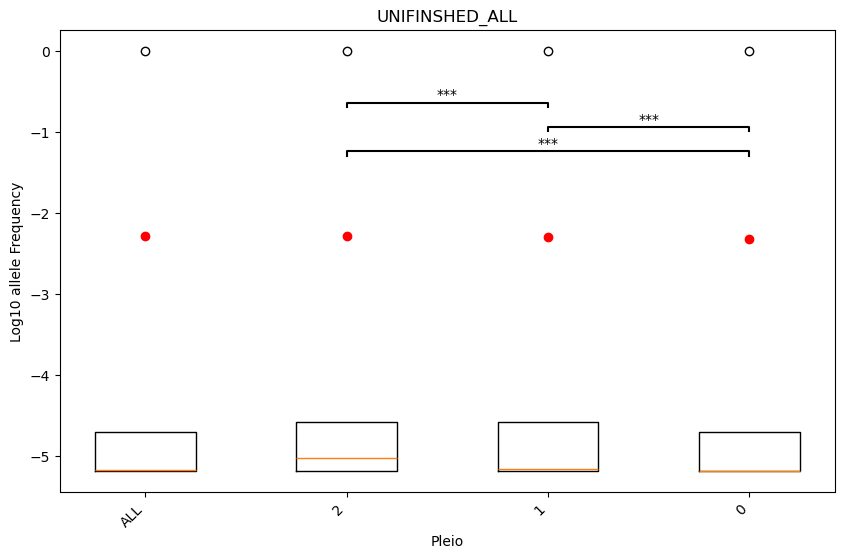

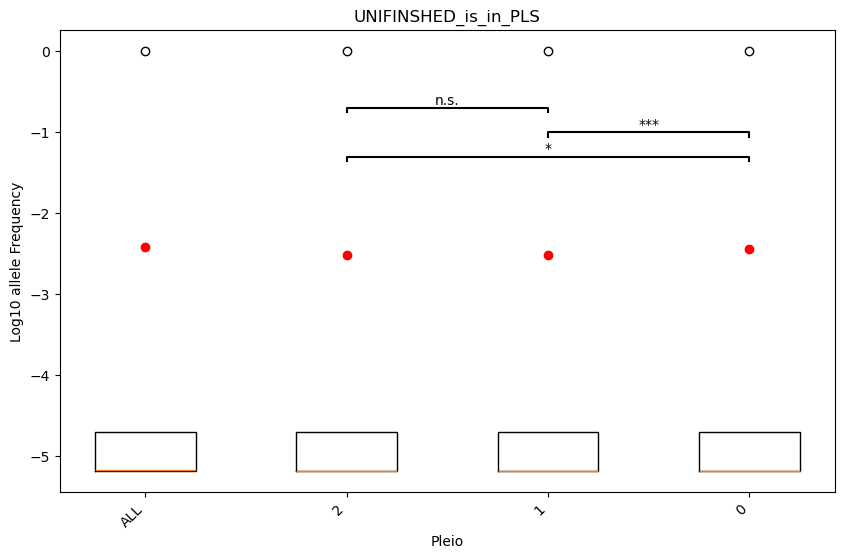

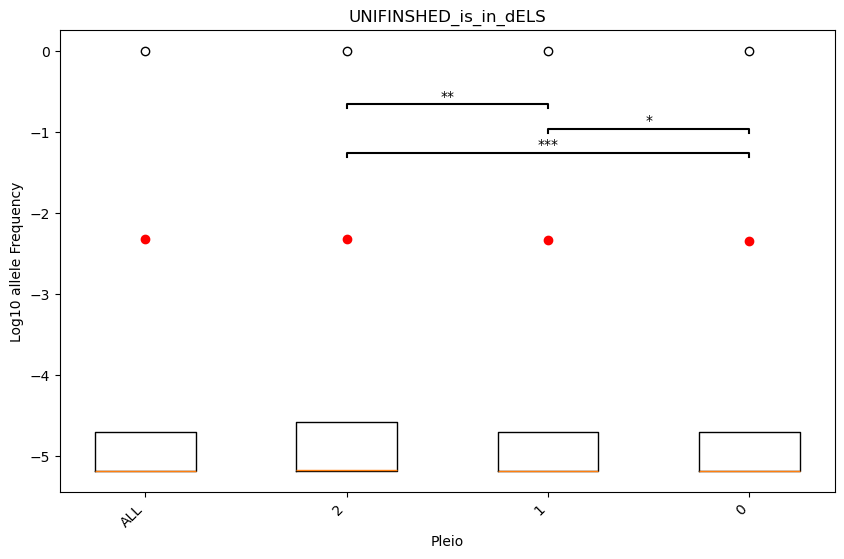

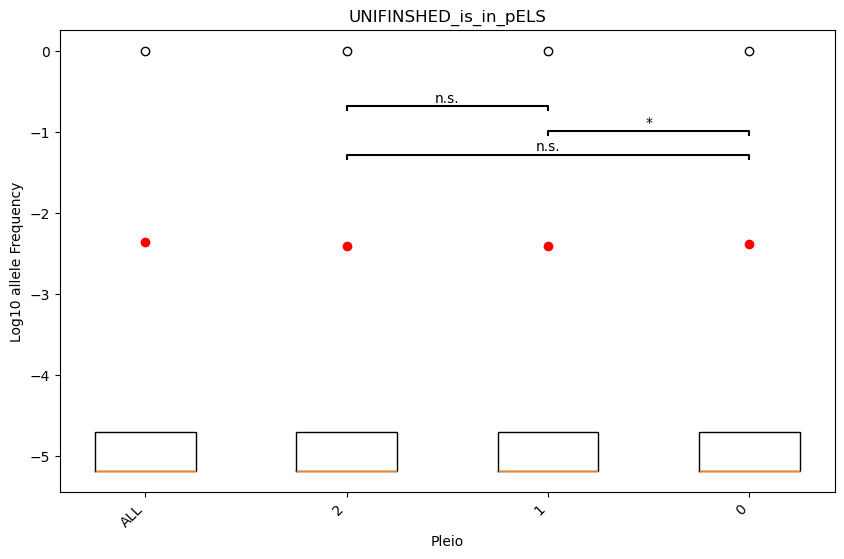

In [120]:
for region in df["region"].unique():
    subset=df[df["region"]==region]
    create_box_plots_with_significance(subset,xlabel="Pleio",title="UNIFINSHED_"+region,ylabel="Log10 allele Frequency",x_tick_label_column="tropy",pairs=[(3,1),(3,2),(2,1)])

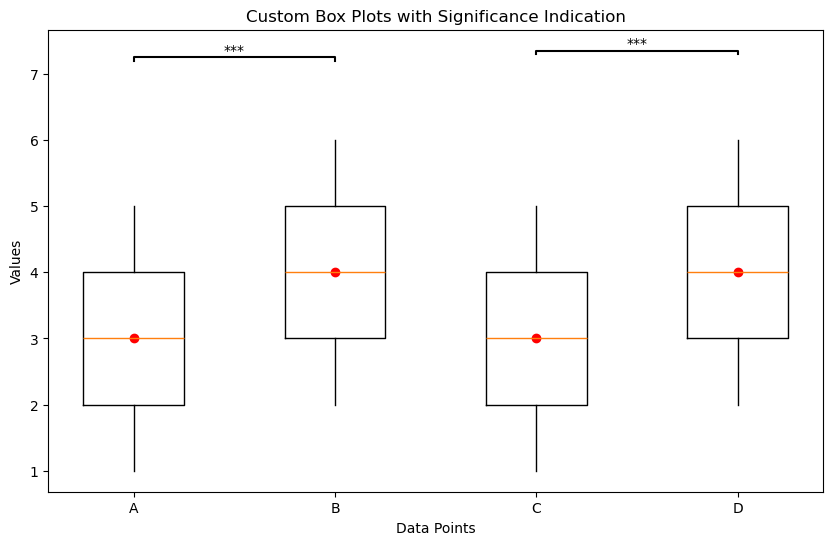

In [13]:
# Example usage
data = {
    'Min': [1, 2, 1, 2],
    '25%': [2, 3, 2, 3],
    '50%': [3, 4, 3, 4],
    '75%': [4, 5, 4, 5],
    'Max': [5, 6, 5, 6],
    'Mean': [3, 4, 3, 4],
    'Std': [1, 1.2, 1, 1.1],
    'Nobs': [30, 30, 30, 30],
}
df = pd.DataFrame(data)
df.index = ['A', 'B', 'C', 'D']
pairs = [(0, 1), (2, 3)]  # Indicate which pairs to test

create_box_plots_with_significance(df, pairs)